In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../Seed_Data.csv')[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


In [21]:
means = np.mean(df.values, axis=0)
means

array([14.84752381,  5.62853333])

In [22]:
data = df.values - means
data

array([[ 4.12476190e-01,  1.34466667e-01],
       [ 3.24761905e-02, -7.45333333e-02],
       [-5.57523810e-01, -3.37533333e-01],
       [-1.00752381e+00, -3.04533333e-01],
       [ 1.29247619e+00,  2.94666667e-02],
       [-4.67523810e-01, -2.42533333e-01],
       [-1.57523810e-01, -6.55333333e-02],
       [-7.37523810e-01, -2.08533333e-01],
       [ 1.78247619e+00,  4.24466667e-01],
       [ 1.59247619e+00,  2.55466667e-01],
       [ 4.12476190e-01,  8.54666667e-02],
       [-8.17523810e-01, -1.90533333e-01],
       [-9.57523810e-01, -1.89533333e-01],
       [-1.06752381e+00, -1.49533333e-01],
       [-1.10752381e+00, -1.46533333e-01],
       [-2.57523810e-01, -2.77533333e-01],
       [-8.57523810e-01, -5.09533333e-01],
       [ 8.42476190e-01, -1.01533333e-01],
       [-1.47523810e-01, -4.23533333e-01],
       [-2.12752381e+00, -4.02533333e-01],
       [-6.87523810e-01,  2.94666667e-02],
       [-7.37523810e-01, -1.08533333e-01],
       [ 1.03247619e+00, -1.05333333e-02],
       [-2.

In [23]:
eigenvectors, eigenvalues, _ = np.linalg.svd(np.cov(data.T), full_matrices=False)
P = eigenvectors[0]
P

array([-0.98965371, -0.14347657])

In [24]:
data_transformed = P.dot(data.T)

In [25]:
P = P.reshape((-1, 1))

In [26]:
P_transformed = np.linalg.pinv(P)
P_transformed

array([[-0.98965371, -0.14347657]])

In [27]:
data_transformed = data_transformed.reshape((-1, 1))

In [30]:
data_restored = data_transformed.dot(P_transformed)
data_restored

array([[ 4.23078358e-01,  6.13364376e-02],
       [ 2.12245047e-02,  3.07705530e-03],
       [-5.93973963e-01, -8.61122915e-02],
       [-1.03002474e+00, -1.49329425e-01],
       [ 1.27005392e+00,  1.84128026e-01],
       [-4.92337409e-01, -7.13773752e-02],
       [-1.63586316e-01, -2.37161785e-02],
       [-7.51951584e-01, -1.09015341e-01],
       [ 1.80605390e+00,  2.61835450e-01],
       [ 1.59596848e+00,  2.31377993e-01],
       [ 4.16120744e-01,  6.03277467e-02],
       [-8.27748884e-01, -1.20004171e-01],
       [-9.64724918e-01, -1.39862483e-01],
       [-1.06678082e+00, -1.54658196e-01],
       [-1.10553143e+00, -1.60276124e-01],
       [-2.91630094e-01, -4.22795227e-02],
       [-9.12220950e-01, -1.32250639e-01],
       [ 8.10716440e-01,  1.17534866e-01],
       [-2.04625352e-01, -2.96658760e-02],
       [-2.14088417e+00, -3.10377985e-01],
       [-6.69186735e-01, -9.70163791e-02],
       [-7.37752372e-01, -1.06956788e-01],
       [ 1.00972647e+00,  1.46386653e-01],
       [-2.

In [31]:
data_restored += means

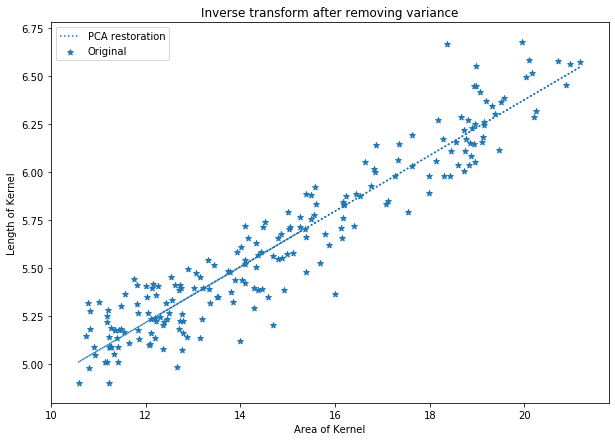

In [33]:
plt.figure(figsize=(10, 7))
plt.plot(data_restored[:,0], data_restored[:,1], linestyle=':', label='PCA restoration')
plt.scatter(df['A'], df['LK'], marker='*', label='Original')
plt.legend()
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Inverse transform after removing variance')
plt.show()

In [34]:
P = eigenvectors
data_transformed = P.dot(data.T)

In [35]:
data_transformed = data_transformed.T

In [36]:
data_restored = data_transformed.dot(P)
data_restored

array([[ 4.12476190e-01,  1.34466667e-01],
       [ 3.24761905e-02, -7.45333333e-02],
       [-5.57523810e-01, -3.37533333e-01],
       [-1.00752381e+00, -3.04533333e-01],
       [ 1.29247619e+00,  2.94666667e-02],
       [-4.67523810e-01, -2.42533333e-01],
       [-1.57523810e-01, -6.55333333e-02],
       [-7.37523810e-01, -2.08533333e-01],
       [ 1.78247619e+00,  4.24466667e-01],
       [ 1.59247619e+00,  2.55466667e-01],
       [ 4.12476190e-01,  8.54666667e-02],
       [-8.17523810e-01, -1.90533333e-01],
       [-9.57523810e-01, -1.89533333e-01],
       [-1.06752381e+00, -1.49533333e-01],
       [-1.10752381e+00, -1.46533333e-01],
       [-2.57523810e-01, -2.77533333e-01],
       [-8.57523810e-01, -5.09533333e-01],
       [ 8.42476190e-01, -1.01533333e-01],
       [-1.47523810e-01, -4.23533333e-01],
       [-2.12752381e+00, -4.02533333e-01],
       [-6.87523810e-01,  2.94666667e-02],
       [-7.37523810e-01, -1.08533333e-01],
       [ 1.03247619e+00, -1.05333333e-02],
       [-2.

In [38]:
data_restored += means

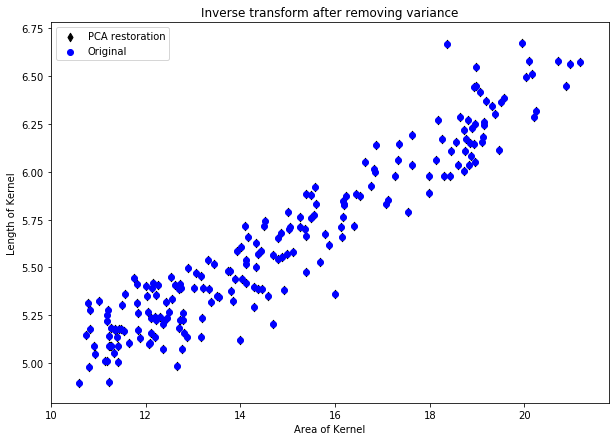

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(data_restored[:,0], data_restored[:,1], marker='d', label='PCA restoration', c='k')
plt.scatter(df['A'], df['LK'], marker='o', label='Original', c='b')
plt.legend()
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Inverse transform after removing variance')
plt.show()